# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Safiullin Amir*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [1]:
import networkx as nx
import numpy as np
import numpy.random as rnd
import numpy.matlib as ml
from scipy.stats import chisquare

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tqdm import *

In [3]:
def CDF(data):
    data=np.sort(data)
    n=len(data)
    y=[1./n for i in data]
    for i in range(1,len(y)):
        y[i]+=y[i-1]
    return data, y

In [4]:
def PDF(data, bins=50):
    plt.title( ' pdf ' )
    b = plt.hist(data,bins=bins)
    plt.plot(1./2*( np.array(b[1][0:len(b[0])-1]) + np.array(b[1][1:len(b[0])]) ), b[0][:-1])
    return b[0]

____

# Model A

In [8]:
ave_path_length = {}
ave_clustering_coef = {}
# to the umber of nodes
ave_node_degee = {}

In [9]:
m = 10
n0 = 10
G_A = nx.empty_graph(n0)

In [10]:
step = 0
for i in tqdm(xrange(0,3000)):
    num_vert = [i for i in range(rnd.randint(G_A.number_of_nodes()))]
    rnd.shuffle(num_vert)
    num_vert = num_vert[0:m]
    k = G_A.number_of_nodes()+1
    G_A.add_node(k)
    for n in num_vert:
        G_A.add_edge(k,n)
    step+=1
    if step % 350 == 0:
        try:
            ave_path_length[step] = (nx.average_shortest_path_length(G_A))
        except:
            pass
        ave_clustering_coef[step] = (nx.average_clustering(G_A))

In [11]:
def model_A(N=1000):
    m = 10
    n0 = 10
    G = nx.empty_graph(n0)
    for i in tqdm(xrange(0,N)):
        num_vert = [i for i in range(rnd.randint(G.number_of_nodes()))]
        rnd.shuffle(num_vert)
        num_vert = num_vert[0:m]
        k = G.number_of_nodes()+1
        G.add_node(k)
        for n in num_vert:
            G.add_edge(k,n)
    return G

In [12]:
for k in [1000, 1500, 3000, 5000]:
    ave_node_degee[k] = model_A(k).degree().values()
## not average! only natural original degree

### PDF and CDF

k = nx.degree(G)
plt.figure(1, figsize=(8,8))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*10 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

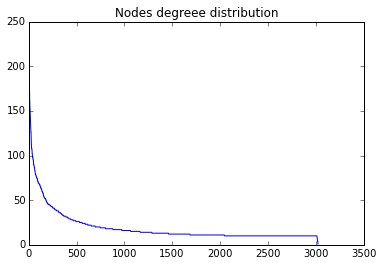

In [13]:
all_degr =np.sort(G_A.degree().values())[::-1]
plt.plot([i for i in range (0, len(all_degr))], all_degr)
plt.title('Nodes degreee distribution')

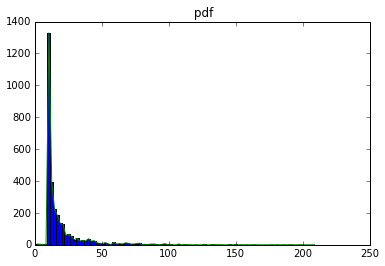

In [14]:
b = PDF(G_A.degree().values(), 100)

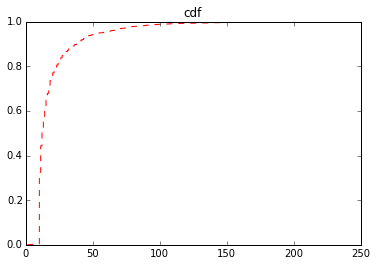

In [15]:
q,w = CDF(G_A.degree().values())
plt.title('cdf')
plt.plot( q, w, '--r')

##### what about scale free?

In [16]:
def mle_alpha(x, x_m):
    tail = np.array([i for i in x if i >= x_m])
    alpha = 1.0 + 1.0 / ( (1. * np.sum(np.log(tail)) ) / len(tail) - np.log(x_m) )
    return alpha, float(alpha-1)/np.sqrt(len(tail))

In [17]:
mle_alpha(G_A.degree().values(), 4)

(1.7347506015421104, 0.013367943079382695)

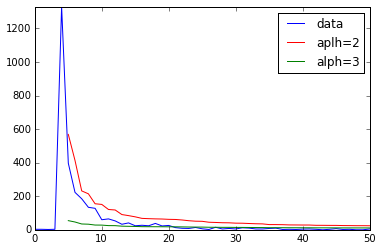

In [18]:
plt.plot(b, label = 'data')

const = 200
r=[rnd.random() for i in range(const)]
alpha=2.01
xmin=5
#x power law
x1=[(1-r[i]) ** (-1.0 / (alpha - 1)) * xmin for i in range(const)]

plt.plot([i+xmin for i in range(const)], sorted(x1)[::-1], '-r'  , label = 'aplh=2')

alpha=3
xmin=5
#x power law
x2=[(1-r[i]) ** (-1.0 / (alpha - 1)) * xmin for i in range(const)]

plt.plot([i+xmin for i in range(const)], sorted(x2)[::-1], '-g' , label = 'alph=3')

plt.xlim([0,50])
plt.ylim([0, max(b)+1])
plt.legend()
plt.title('')

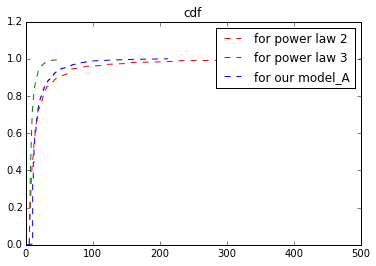

In [19]:
q,w = CDF(x1)
plt.title('cdf')
plt.plot( q, w, '--r', label = 'for power law 2')
q,w = CDF(x2)
plt.plot( q, w, '--g', label = 'for power law 3')
q,w = CDF(G_A.degree().values())
plt.plot( q, w, '--b' , label='for our model_A' )
plt.xlim([0,500])
plt.legend()

### it's seems that distribution looks like a power law
#### and scale-free property conserved in these model.



# Looking on the prop

#### 1. average node degee to the nodes "age"

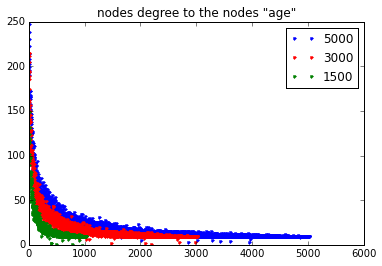

In [20]:
plt.title('nodes degree to the nodes "age"')
plt.plot(ave_node_degee[5000],'.b', label = '5000')
plt.plot(ave_node_degee[3000],'.r', label = '3000')
plt.plot(ave_node_degee[1000],'.g', label = '1500')
plt.legend()

> видно что из-за preferantial attachment у "старших" вершин степень их больше. 

> Так же видно, что чем больше число вершин в графе, тем больше степень вершин. что в принципе логично для такого способа 
построения модели

#### 2. average path length to the number of nodes



In [21]:
ave_path_length

{350: 2.3100639734628596,
 1400: 2.67511472777552,
 1750: 2.7301182966606463,
 2100: 2.774678213525132,
 2450: 2.813687501390421,
 2800: 2.8468370899099766}

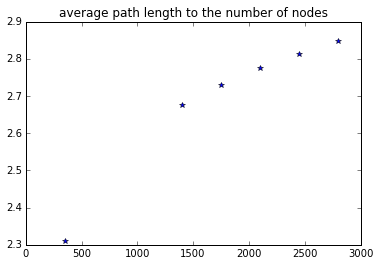

In [22]:
k_sort=np.argsort(ave_path_length.keys())
plt.plot(np.array(ave_path_length.keys())[k_sort], np.array(ave_path_length.values())[k_sort], '*b')
plt.title('average path length to the number of nodes')

Aver. path of length ~ $ \frac{log(N)}{log(log(N))}$

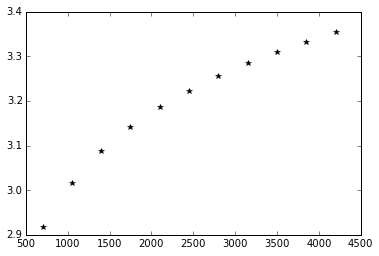

In [23]:
# Theoretical
for i in [700 + i * 350 for i in range(0,11)]:
    plt.plot(i, np.log2(i)/np.log2(np.log2(i)), '*k')

#### 3. average clustering coefficient to the number of nodes

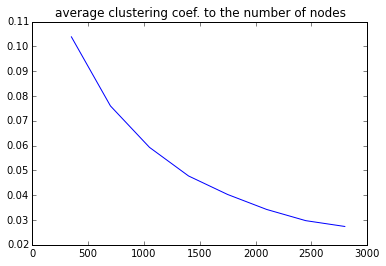

In [24]:
k_sort=np.argsort(ave_clustering_coef.keys())
plt.plot(np.array(ave_clustering_coef.keys())[k_sort],np.array(ave_clustering_coef.values())[k_sort])
plt.title('average clustering coef. to the number of nodes')

Clust. coef. ~ $ N^{-0.75} $

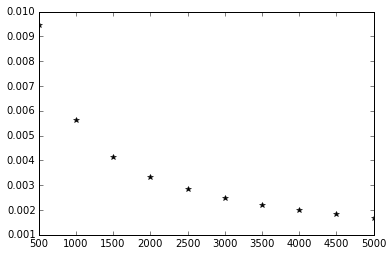

In [25]:
# Theoretical
for i in [500* i for i in range(1,11)]:
    plt.plot(i, i**(-0.75), '*k')

> как мы видим, формы кривых совпадают с теоретическими 

# Model B

In [30]:
ave_node_degee = {} #to the nodes "age"

In [31]:
m = 30
n0 = 5000
G_B = nx.empty_graph(n0)

G_B.add_edges_from(zip( np.array(G_B.nodes()).astype(np.int), [n0 for i in range(m)]))
age = 0
for ts in tqdm(xrange(0,n0)):
    
    n_node = rnd.randint(len(G_B.nodes()))
    repeated_nodes = G_B.nodes()
    repeated_nodes.remove(int(n_node))
    neighbors = G_B.neighbors(n_node)
    degr = G_B.degree()
    potential_targets = [float(degr[n]) for n in repeated_nodes if n not in neighbors and degr[n]>0]
    #a = [i  for i in potential_targets if i>0 ]
    potential_targets= np.array(potential_targets) / min(potential_targets)
    
    kkkk = [int(i) for i in range(len(potential_targets)) for j in range(int(potential_targets[i])) ] 
    rnd.shuffle(kkkk) 
    m_real = rnd.randint(1,m,1)[0]

    G_B.add_edges_from(zip( kkkk[0:m_real], [n_node for i in range(m_real)]))
    
    if age % 350 == 0:
        nd = np.mean(G_B.degree().values())
        ave_node_degee[age] = nd
    age+=1

In [32]:
def model_B (n0 = 1000 , m = 30):
    G_B = nx.empty_graph(n0)
    G_B.add_edges_from(zip( np.array(G_B.nodes()).astype(np.int), [n0 for i in range(m)]))
    for ts in tqdm(xrange(0,n0)):
        n_node = ts #rnd.randint(len(G_B.nodes()))
        repeated_nodes = G_B.nodes()
        repeated_nodes.remove(int(n_node))
        neighbors = G_B.neighbors(n_node)
        degr = G_B.degree()
        potential_targets = [float(degr[n]) for n in repeated_nodes if n not in neighbors and degr[n]>0]
        potential_targets= np.array(potential_targets) / min(potential_targets)
        kkkk = [int(i) for i in range(len(potential_targets)) for j in range(int(potential_targets[i])) ] 
        rnd.shuffle(kkkk) 
        m_real = rnd.randint(1,m,1)[0]
        G_B.add_edges_from(zip( kkkk[0:m_real], [n_node for i in range(m_real)]))
    return G_B

k = nx.degree(G)
plt.figure(1, figsize=(8,8))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*10 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

### PDF and CDF

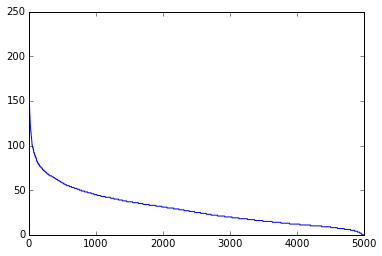

In [33]:
all_degr = np.sort(G_B.degree().values())[::-1]
plt.plot(all_degr)

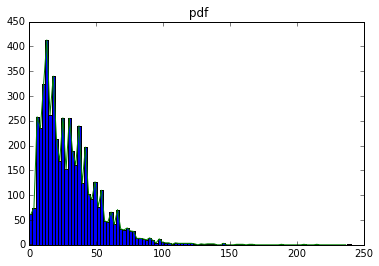

In [34]:
b = PDF(G_B.degree().values(), 100)

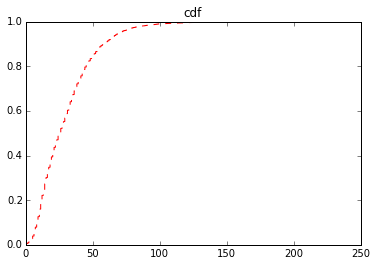

In [35]:
q,w = CDF(G_B.degree().values())
plt.title('cdf')
plt.plot( q, w, '--r', label = 'cdf')

### this distr. almost looks like a Poisson distribution 
#### scale-free property isn't conserved in these model.

In [36]:
ave_node_degee

{0: 0.017596480703859229,
 350: 2.0967806438712255,
 700: 4.2435512897420518,
 1050: 6.2695460907818434,
 1400: 8.3383323335332928,
 1750: 10.514697060587883,
 2100: 12.565086982603479,
 2450: 14.627474505098981,
 2800: 16.81623675264947,
 3150: 18.901819636072787,
 3500: 21.006198760247951,
 3850: 23.140971805638873,
 4200: 25.299340131973604,
 4550: 27.404119176164766,
 4900: 29.522095580883825}

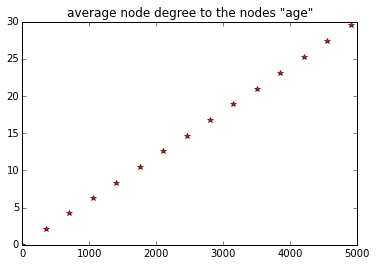

In [37]:
k_sort=np.argsort(ave_node_degee.keys())
plt.plot(np.array(ave_node_degee.keys())[k_sort], np.array(ave_node_degee.values())[k_sort], '*r')
plt.title('average node degree to the nodes "age"')

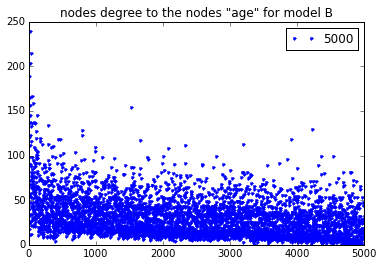

In [40]:
plt.title('nodes degree to the nodes "age" for model B')
plt.plot(G_B.degree().values(),'.b', label = '5000')
plt.legend()

In [38]:

n = [1000, 2000, 3000, 4000, 5000]
G_Bs=[]
for _ in n:
    G_Bs.append(model_B(_))

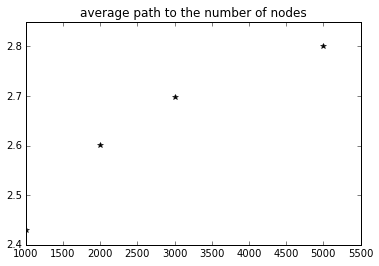

In [39]:
for G in G_Bs:
    try:
        plt.plot( len(G.nodes()), np.mean(nx.average_shortest_path_length(G)), '*k' )
    except:
        pass
plt.title('average path to the number of nodes')

> Для модели с последовательным обходом вершин, а не выбирая случайную вершину на каждом time-stamp

Aver. path of length ~ $ \frac{log(N)}{log(log(N))}$

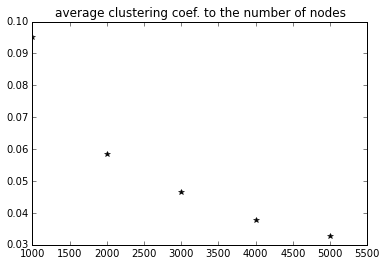

In [41]:
for G in G_Bs:
    plt.plot( len(G.nodes()), np.mean(nx.average_clustering(G)), '*k' )
plt.title('average clustering coef. to the number of nodes')

Clust. coef. ~ $ N^{-0.75} $

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

In [42]:
q=1./2

In [43]:
def model_2(n0=8, m=1, is_dir=False):
    if is_dir:
        G = nx.DiGraph()
        tmp = [i for i in range(n0)]
        for i in tmp:
            G.add_node(i)
        tmp1 = rnd.randint(0, n0/2, n0)
        G.add_edges_from(zip (tmp[0:n0], tmp1) )
    else:
        G=nx.random_graphs.barabasi_albert_graph(n0,m)
        
    return G

def model_2_go(G, q=1./2, N=1000):
    for i in tqdm(xrange(N)):
        
        nodes = G.nodes()
        len_nodes = len(nodes)
        n_node = rnd.randint(len_nodes)
        neighbors = G.neighbors(n_node)

        rnd.shuffle(neighbors)
        neighbors = neighbors[:int(len(neighbors)*q)]

        rnd.shuffle(nodes)
        nodes = nodes[:int(len_nodes*(1-q))]

        G.add_node(len_nodes)
        G.add_edges_from(zip( [len_nodes] * len(neighbors) , neighbors))
        G.add_edges_from(zip( [len_nodes] * len(nodes) , nodes))
       
    return G

In [44]:
G = model_2(is_dir=True)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


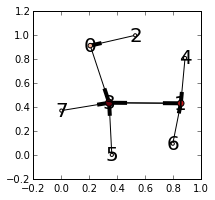

In [45]:
k = nx.degree(G)
plt.figure(2, figsize=(3,3))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*10 for d in k.values()],
                 node_color=k.values(),
                 font_size=20,
                 cmap=plt.cm.Reds,
                 )

In [46]:
ave_path_length_2 = {}
ave_clustering_coef_2 = {}
# to the umber of nodes
ave_node_degee_2 = []
step = 1
for i in tqdm(xrange(2000)):
    
    nodes = G.nodes()
    len_nodes = len(nodes)
    n_node = rnd.randint(len_nodes)
    neighbors = G.neighbors(n_node)
    
    rnd.shuffle(neighbors)
    neighbors = neighbors[:int(len(neighbors)*q)]
    
    rnd.shuffle(nodes)
    nodes = nodes[:int(len_nodes*(1-q))]

    G.add_node(len_nodes)
    for neighbors_ in neighbors:
        G.add_edge(len_nodes,neighbors_)
    #G.add_edges_from(zip( [len_nodes] * len(neighbors) , neighbors))
    
    G.add_edges_from(zip( [len_nodes] * len(nodes) , nodes))
    if (step % 300) == 0:
        try:
            ave_path_length_2[step] = (nx.average_shortest_path_length(G))
        except:
            pass
        #ave_clustering_coef_2[step] = (nx.average_clustering(G)) # for directed dont determ
    step+=1

k = nx.degree(G)
plt.figure(2, figsize=(4,4))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*10 for d in k.values()],
                 node_color=k.values(),
                 font_size=20,
                 cmap=plt.cm.Reds,
                 )

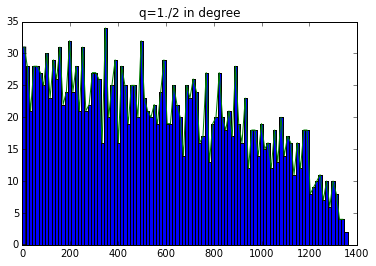

In [47]:
b = PDF(G.in_degree().values(), 100)
plt.title('q=1./2 in degree')

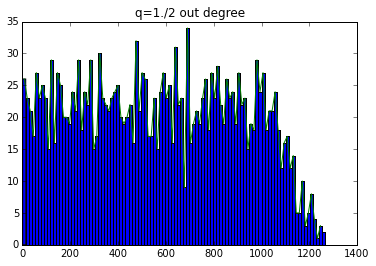

In [48]:
b = PDF(G.out_degree().values(), 100)
plt.title('q=1./2 out degree')

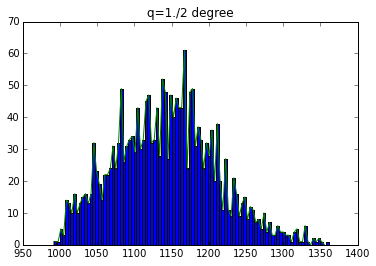

In [49]:
b = PDF(G.degree().values(), 100)
plt.title('q=1./2 degree')

# взглянем на разные параметры:

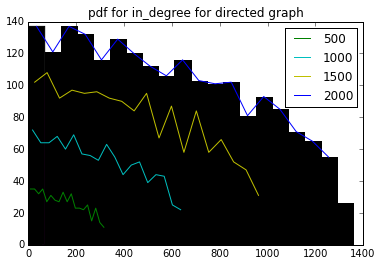

In [56]:
count=0
for n in [500, 1000, 1500, 2000]:
    G = model_2_go(model_2(is_dir=True), N=n)
    b = PDF(G.in_degree().values(), 20)
    plt.legend([500, 1000, 1500, 2000])
    plt.title('pdf for in_degree for directed graph')

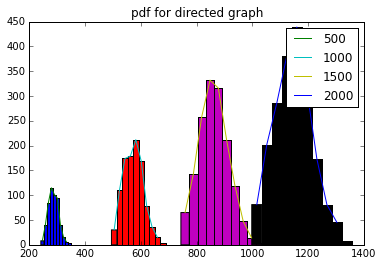

In [57]:
count=0
for n in [500, 1000, 1500, 2000]:
    G = model_2_go(model_2(is_dir=True), N=n)
    b = PDF(G.degree().values(), 10)
    plt.legend([500, 1000, 1500, 2000])
    plt.title('pdf for directed graph')

> видно что распределение степеней вершин направленного графа нормальное

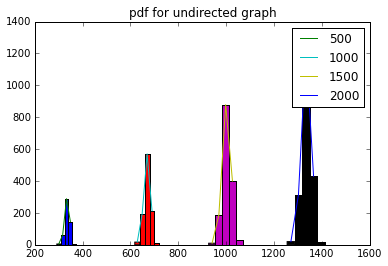

In [58]:
count=0
for n in [500, 1000, 1500, 2000]:
    G = model_2_go(model_2(is_dir=False), N=n)
    b = PDF(G.degree().values(), 5)
    plt.legend([500, 1000, 1500, 2000])
    plt.title('pdf for undirected graph')

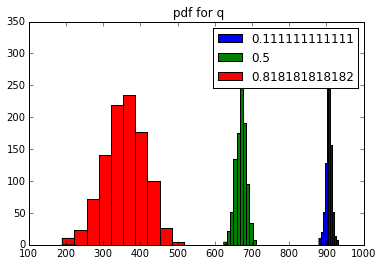

In [59]:
count=0
for q in [1./9, 1./2, 10./11]:
    G = model_2_go(model_2(is_dir=False), q=q)
    plt.title( ' pdf for q ')
    b = plt.hist(G.degree().values(),bins=10)
    plt.legend([1./9, 1./2, 9./11])

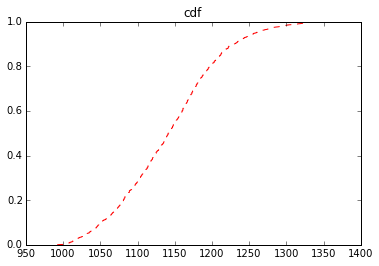

In [50]:
q,w = CDF(G.degree().values())
plt.title('cdf')
plt.plot( q, w, '--r', label = 'cdf')

> для направленного графа можем посчитать эти характеристики:

In [52]:
ave_path_length_2

{300: 0.7065865730360844,
 600: 0.7107810196826498,
 900: 0.7130650496141124,
 1200: 0.7131769973169755,
 1500: 0.7126407446065135,
 1800: 0.7132690716045271}

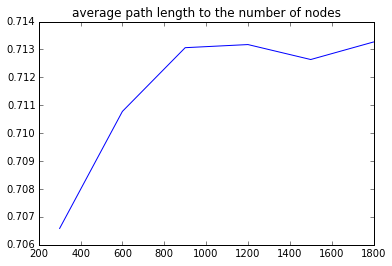

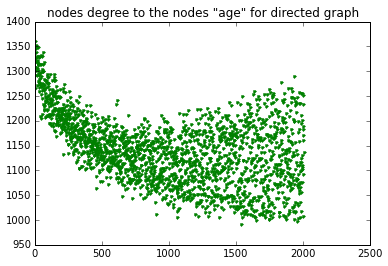

In [51]:
# for directed graph 
plt.figure(1)
k_sort=np.argsort(ave_path_length_2.keys())
plt.plot(np.array(ave_path_length_2.keys())[k_sort], np.array(ave_path_length_2.values())[k_sort])
plt.title('average path length to the number of nodes')

plt.figure(3)
plt.plot(G.degree().values(), '.g')
plt.title('nodes degree to the nodes "age" for directed graph')


> для ненаправленного графа:

In [54]:
G=model_2(is_dir=False)
q=1./2
ave_path_length_2 = {}
ave_clustering_coef_2 = {}
# to the umber of nodes
ave_node_degee_2 = []
step = 1
for i in tqdm(xrange(2000)):
    
    nodes = G.nodes()
    len_nodes = len(nodes)
    n_node = rnd.randint(len_nodes)
    neighbors = G.neighbors(n_node)
    
    rnd.shuffle(neighbors)
    neighbors = neighbors[:int(len(neighbors)*q)]
    
    rnd.shuffle(nodes)
    nodes = nodes[:int(len_nodes*(1-q))]

    G.add_node(len_nodes)
    for neighbors_ in neighbors:
        G.add_edge(len_nodes,neighbors_)
    #G.add_edges_from(zip( [len_nodes] * len(neighbors) , neighbors))
    
    G.add_edges_from(zip( [len_nodes] * len(nodes) , nodes))
    if (step % 350) == 0:
        try:
            ave_path_length_2[step] = (nx.average_shortest_path_length(G))
        except:
            pass
        ave_clustering_coef_2[step] = (nx.average_clustering(G)) # for directed dont determ
    step+=1

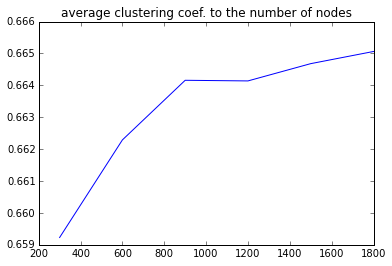

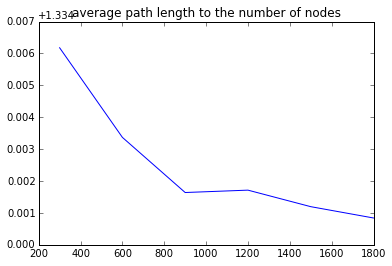

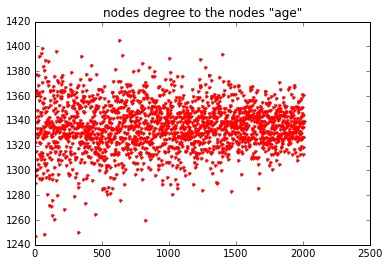

In [55]:
# for undirected graph

plt.figure(0)
k_sort=np.argsort(ave_clustering_coef_2.keys())
plt.plot(np.array(ave_clustering_coef_2.keys())[k_sort],np.array(ave_clustering_coef_2.values())[k_sort])
plt.title('average clustering coef. to the number of nodes')


plt.figure(1)
k_sort=np.argsort(ave_path_length_2.keys())
plt.plot(np.array(ave_path_length_2.keys())[k_sort], np.array(ave_path_length_2.values())[k_sort])
plt.title('average path length to the number of nodes')


plt.figure(3)
plt.plot(G.degree().values(), '.r')
plt.title('nodes degree to the nodes "age" ')